In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [2]:
data_path = os.path.join(rpath,'data','data_aggregated.csv')
data = pd.read_csv(data_path)
data

,CustomerId,FirstTransactionDate,LastTransactionDate,FirstDay,FirstMonth,FirstYear,LastDay,LastMonth,LastYear,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,Recency,Frequency,Monetary,Stability,Label
0,CustomerId_1,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00,21,11,2018,21,11,2018,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,83,1,-10000.0,0.000000,Bad
1,CustomerId_10,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00,21,11,2018,21,11,2018,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,83,1,-10000.0,0.000000,Bad
2,CustomerId_1001,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00,16,11,2018,16,11,2018,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,89,5,20000.0,6558.963333,Bad
3,CustomerId_1002,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00,15,11,2018,18,1,2019,4225.0,384.090909,11,560.498966,-75.0,1500.0,25,11,4225.0,560.498966,Good
4,CustomerId_1003,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00,1,2,2019,1,2,2019,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,11,6,20000.0,6030.478146,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00,8,2,2019,8,2,2019,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,4,6,20000.0,6088.240030,Good
3738,CustomerId_993,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00,18,1,2019,18,1,2019,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,25,5,20000.0,6745.368782,Good
3739,CustomerId_994,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00,15,11,2018,12,2,2019,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,0,101,543873.0,14800.656784,Good
3740,CustomerId_996,2018-12-07 14:37:54+00:00,2018-12-07 15:24:31+00:00,7,12,2018,7,12,2018,139000.0,8176.470588,17,4433.329648,-5000.0,10000.0,67,17,139000.0,4433.329648,Bad


In [3]:
data.columns

Index(['CustomerId', 'FirstTransactionDate', 'LastTransactionDate', 'FirstDay',
       'FirstMonth', 'FirstYear', 'LastDay', 'LastMonth', 'LastYear',
       'TotalTransactionAmount', 'AverageTransactionAmount',
       'TransactionCount', 'TransactionAmountStdDev', 'MinTransactionAmount',
       'MaxTransactionAmount', 'Recency', 'Frequency', 'Monetary', 'Stability',
       'Label'],
      dtype='object')

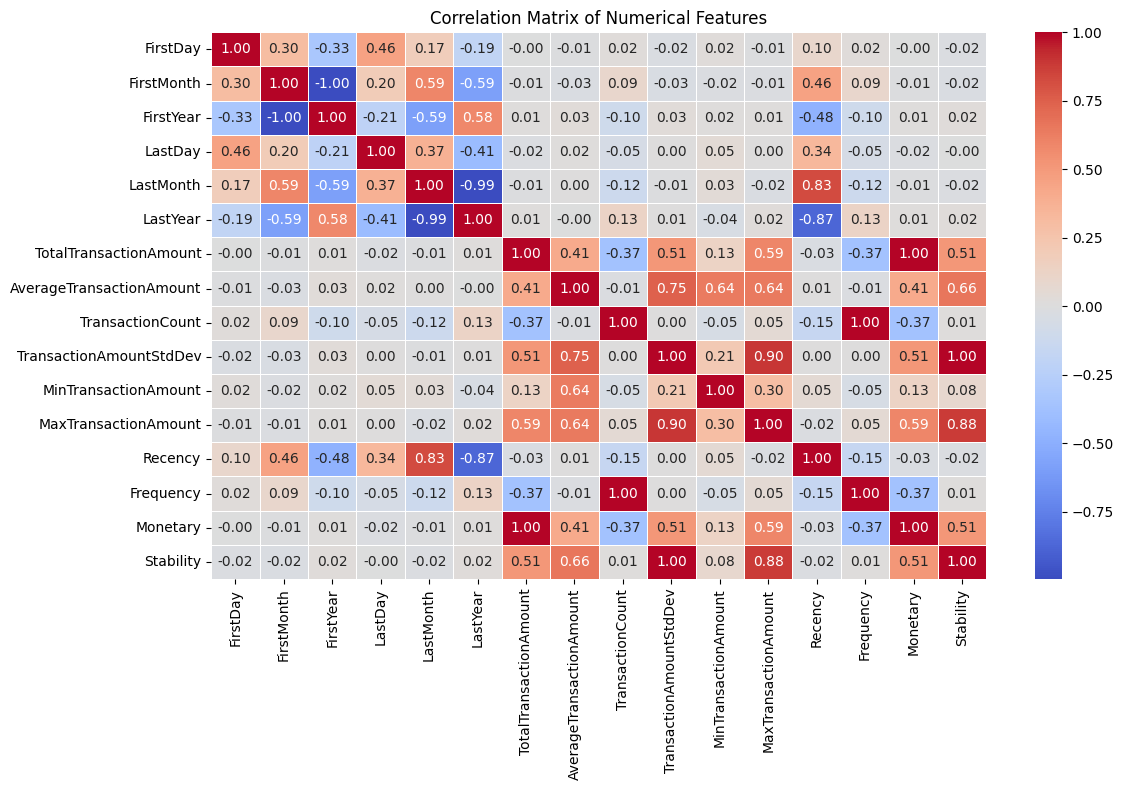

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute and visualize the correlation matrix
def plot_correlation_matrix(df):
    # Select only numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Compute the correlation matrix
    corr_matrix = df[numerical_columns].corr(method='pearson')  # Using Pearson by default

    # Display the correlation matrix as a heatmap
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
    ax.set_title("Correlation Matrix of Numerical Features")

    plt.tight_layout()
    #st.pyplot(fig)

# Call the function to display the correlation matrix
plot_correlation_matrix(data)

In [5]:
data.isnull().sum()

CustomerId                    0
FirstTransactionDate          0
LastTransactionDate           0
FirstDay                      0
FirstMonth                    0
FirstYear                     0
LastDay                       0
LastMonth                     0
LastYear                      0
TotalTransactionAmount        0
AverageTransactionAmount      0
TransactionCount              0
TransactionAmountStdDev     712
MinTransactionAmount          0
MaxTransactionAmount          0
Recency                       0
Frequency                     0
Monetary                      0
Stability                     0
Label                         0
dtype: int64

In [6]:
data['TransactionAmountStdDev'] = data['TransactionAmountStdDev'].fillna(method='ffill').fillna(method='bfill')

C:\Users\fikad\AppData\Local\Temp\ipykernel_9284\3409925125.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['TransactionAmountStdDev'] = data['TransactionAmountStdDev'].fillna(method='ffill').fillna(method='bfill')


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score


# Extract relevant features (adjust based on your columns)
X = data[['FirstDay','FirstMonth', 'FirstYear', 'LastDay', 'LastMonth', 'LastYear',
       'TotalTransactionAmount', 'AverageTransactionAmount','TransactionCount', 'TransactionAmountStdDev', 'MinTransactionAmount',
       'MaxTransactionAmount', 'Recency', 'Frequency', 'Monetary', 'Stability',]]
y = data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = model.predict(X_test)

encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Make predictions
#y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)  # or "Bad" depending on what you want as the positive class

#f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9987
F1 Score: 0.9984
Precision: 0.9968
Recall: 1.0000


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=50, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", random_search.best_params_)

# Get the best estimator
best_rf = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9987
Confusion Matrix:
 [[434   1]
 [  0 314]]
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       435
        Good       1.00      1.00      1.00       314

    accuracy                           1.00       749
   macro avg       1.00      1.00      1.00       749
weighted avg       1.00      1.00      1.00       749



In [13]:
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

In [14]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)  # or "Bad" depending on what you want as the positive class

#f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9987
F1 Score: 0.9984
Precision: 0.9968
Recall: 1.0000


In [15]:
import os
import pickle
from datetime import datetime

# Assuming 'best_rf' is your trained model
model_dir = os.path.join("..", "models")  # Ensures the path is system-compatible

# Ensure the directory exists
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Generate timestamped filename
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')
filename = os.path.join(model_dir, f'RF-{timestamp}.pkl')

# Save the model
with open(filename, 'wb') as file:
    pickle.dump(best_rf, file)

print(f'Model saved as {filename}')


Model saved as ..\models\RF-31-01-2025-23-21-00-970407.pkl


In [16]:
import shap

# Initialize the SHAP explainer using the trained Random Forest model
explainer = shap.TreeExplainer(best_rf)  # Use the tuned model

# Compute SHAP values for the entire dataset or a subset
shap_values = explainer.shap_values(X_test)

c:\Users\fikad\Desktop\DESKTOP\CreditRiskModeling\Week-6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


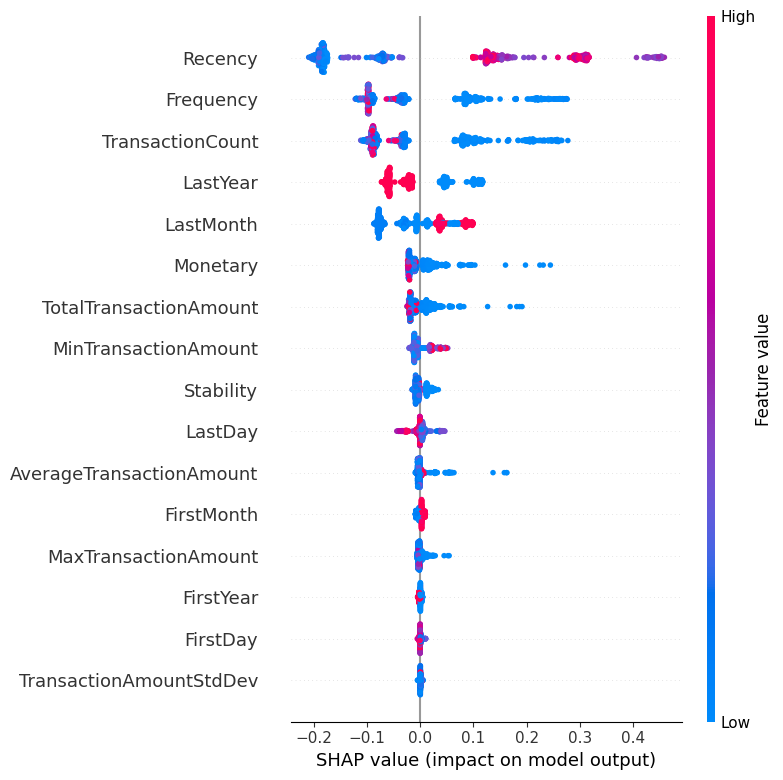

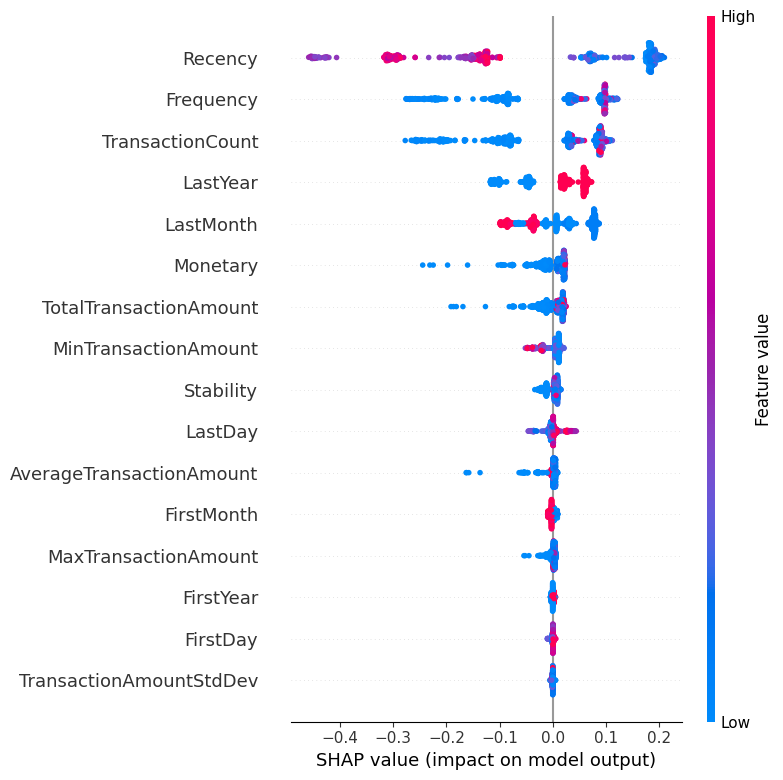

In [17]:
# Extract SHAP values for each class
shap_values_class_0 = shap_values[:, :, 0]  # Shape (749, 10)
shap_values_class_1 = shap_values[:, :, 1]  # Shape (749, 10)

# Plot summary for class 0
shap.summary_plot(shap_values_class_0, X_test, feature_names=X_test.columns)

# Plot summary for class 1
shap.summary_plot(shap_values_class_1, X_test, feature_names=X_test.columns)

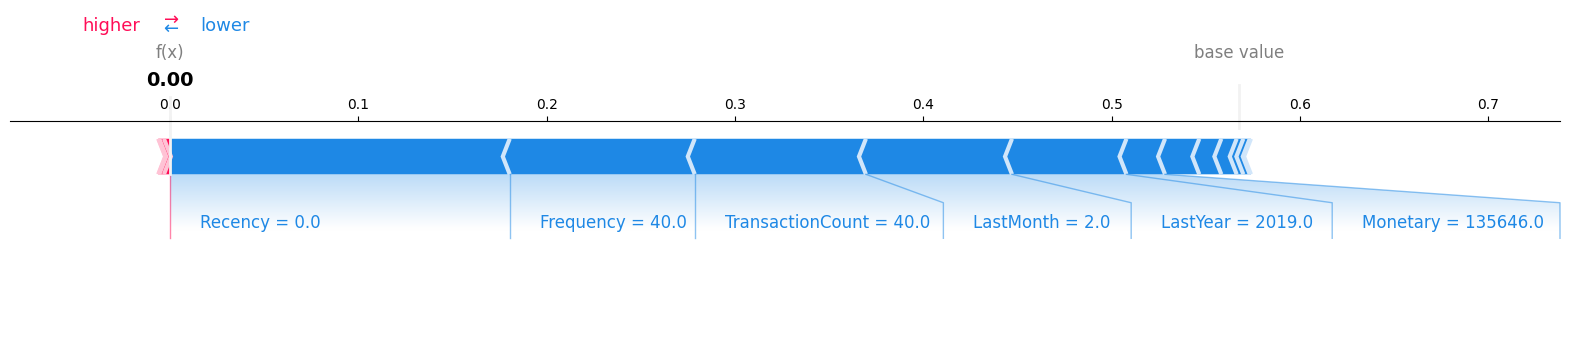

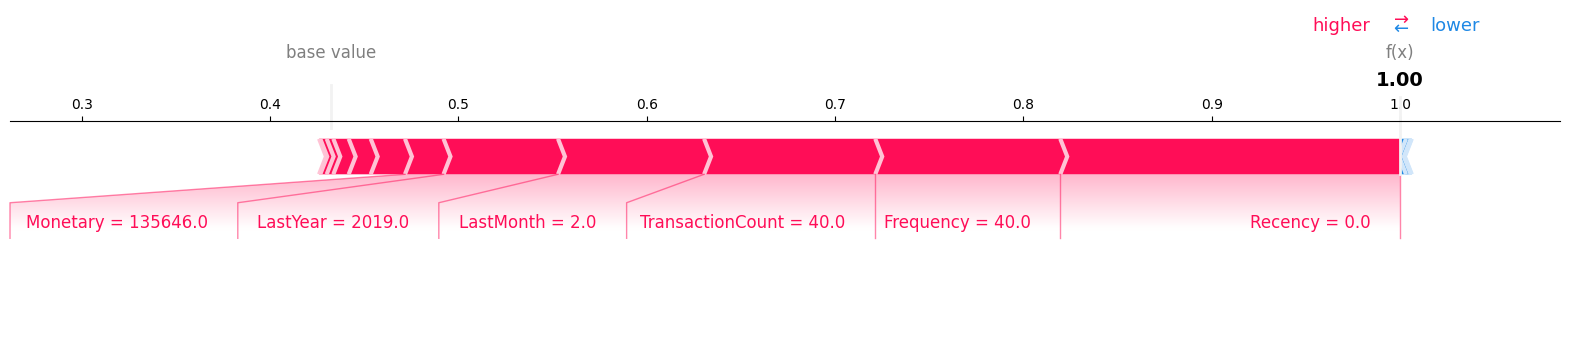

In [18]:
# Choose an instance index (e.g., 0 for the first instance)
instance_index = 0

# Extract SHAP values and features for the specific instance and class
shap_values_instance_class_0 = shap_values[instance_index, :, 0]  # SHAP values for class 0
features_instance = X_test.iloc[instance_index]  # Features for that instance

# Create the force plot for class 0
shap.force_plot(explainer.expected_value[0], shap_values_instance_class_0, features_instance, matplotlib=True)

# If you want to plot for class 1, do the same
shap_values_instance_class_1 = shap_values[instance_index, :, 1]  # SHAP values for class 1
shap.force_plot(explainer.expected_value[1], shap_values_instance_class_1, features_instance, matplotlib=True)

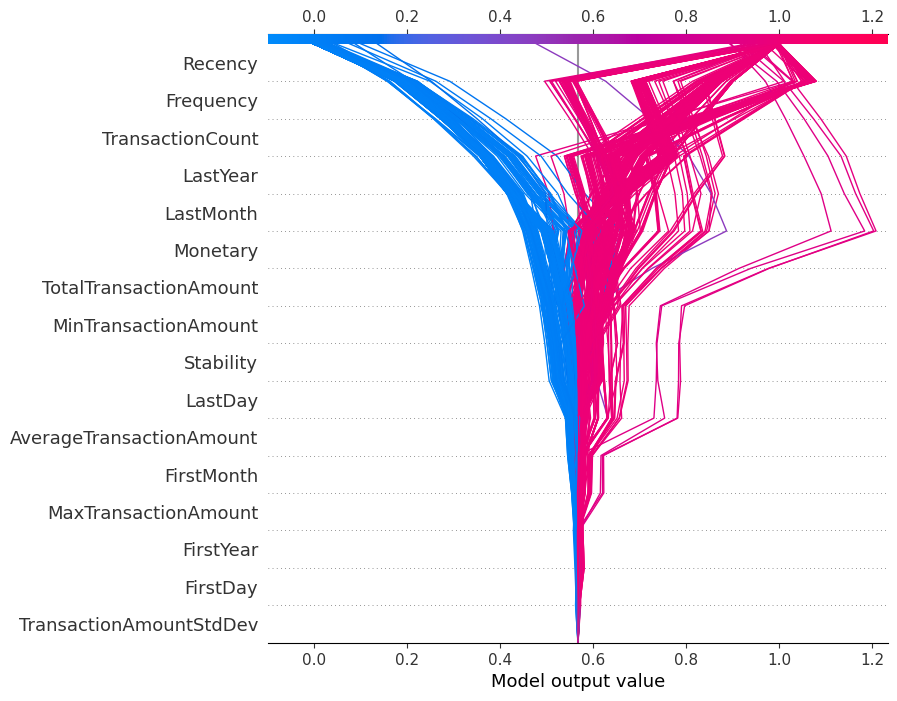

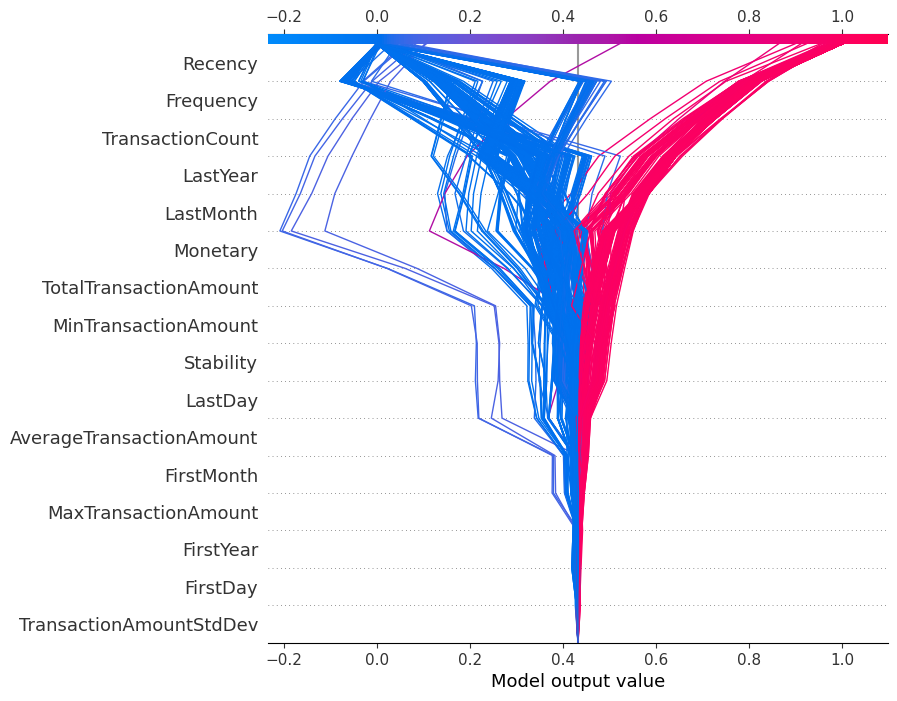

In [19]:
shap.decision_plot(explainer.expected_value[0], shap_values_class_0, X_test.columns)
shap.decision_plot(explainer.expected_value[1], shap_values_class_1, X_test.columns)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


✅ Accuracy: 1.0000

📌 Confusion Matrix:
      Bad  Good
Bad   435     0
Good    0   314


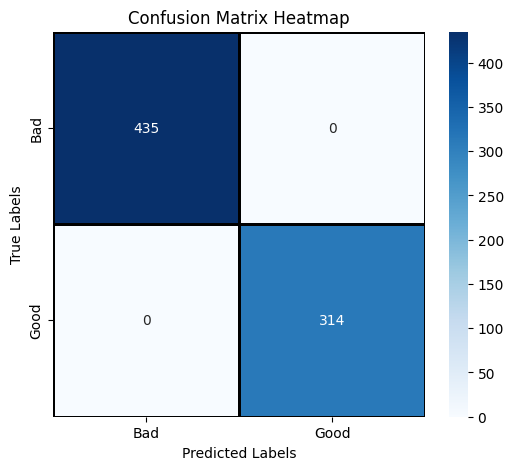


📊 Classification Report:
              precision  recall  f1-score  support
Bad                 1.0     1.0       1.0    435.0
Good                1.0     1.0       1.0    314.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    749.0
weighted avg        1.0     1.0       1.0    749.0


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("=" * 50)
print(f"✅ Accuracy: {accuracy:.4f}")
print("=" * 50)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better formatting
labels = np.unique(y_test)  # Get unique class labels
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

print("\n📌 Confusion Matrix:")
print(conf_df)

# Visualize Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues", linewidths=1, linecolor="black")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Compute Classification Report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert report to a Pandas DataFrame for better formatting
report_df = pd.DataFrame(report).T
print("\n📊 Classification Report:")
print(report_df.round(4))


In [26]:
from scipy.stats import randint, uniform

gbm = GradientBoostingClassifier()

# Parameter grid for randomized search
param_distributions = {
    'n_estimators': randint(100, 1000),  # Number of boosting stages
    'learning_rate': uniform(0.01, 0.3),  # Shrinks the contribution of each tree
    'max_depth': randint(3, 10),  # Maximum depth of the individual trees
    'min_samples_split': randint(2, 10),  # Minimum number of samples to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=param_distributions,
    n_iter=100,  # Number of different parameter combinations to try
    scoring='accuracy',  # Metric to evaluate the model
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Verbose mode to display progress
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'learning_rate': np.float64(0.12236203565420874), 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 120}
Best cross-validation score: 1.0


In [ ]:
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Make predictions
y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
f1 = f1_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded)
recall = recall_score(y_test_encoded, y_pred_encoded)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000


ROC-AUC Score: 1.0


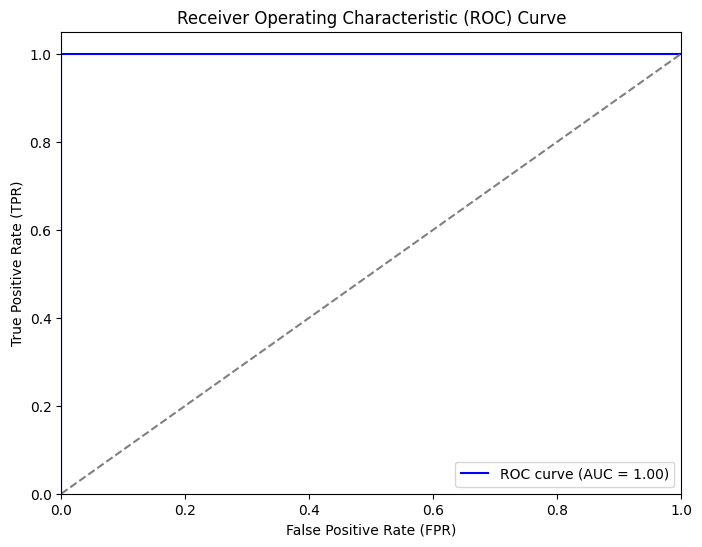

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]  # [:, 1] gives the probabilities for class 1 (positive class)

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded, y_pred_proba)
print(f"ROC-AUC Score: {auc_score}")

# Get the ROC curve data
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
import pickle
from datetime import datetime

# Assuming 'model' is your trained LSTM model

# Get the current timestamp
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')

# Format the filename
filename = f'../models/GBM-{timestamp}.pkl'

# Save the model with pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved as {filename}')

Model saved as ../models/GBM-31-01-2025-23-47-46-348656.pkl


In [33]:
import shap

# Initialize the SHAP explainer using the trained Random Forest model
explainer = shap.TreeExplainer(model)  # Use the tuned model

# Compute SHAP values for the entire dataset or a subset
shap_values = explainer.shap_values(X_test)

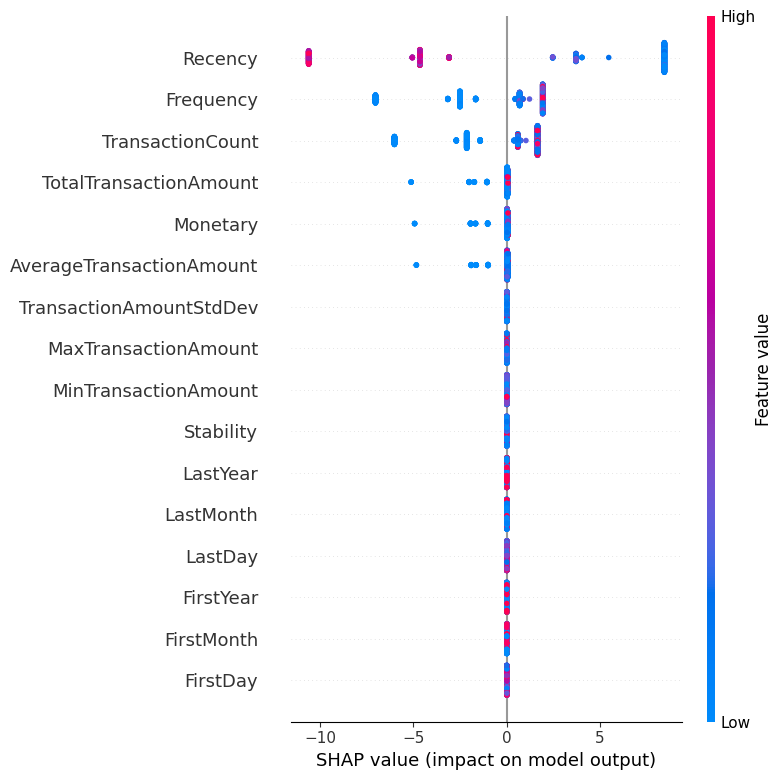

In [34]:
# Plot summary 
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

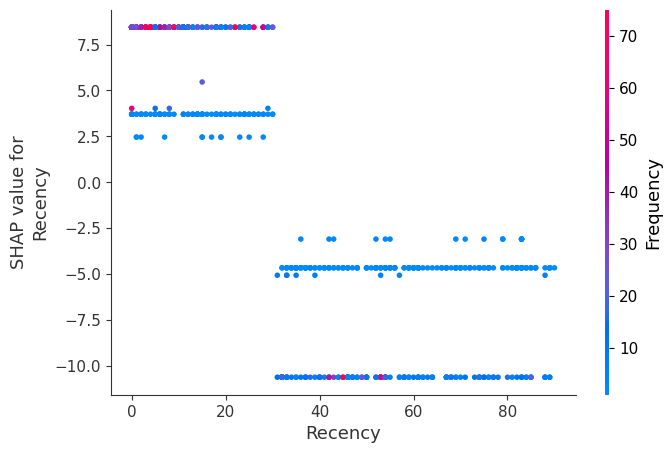

In [35]:
shap.dependence_plot('Recency', shap_values, X_test)

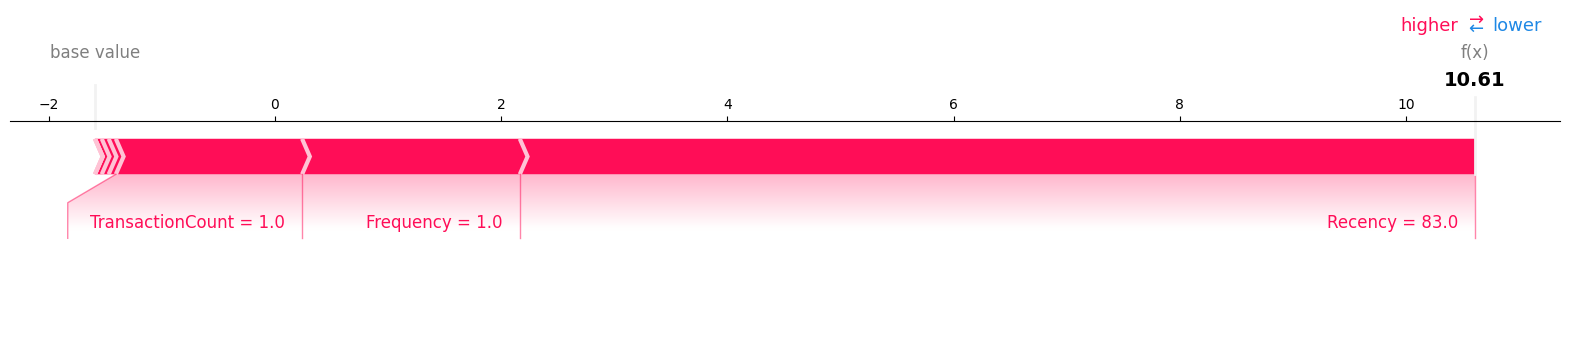

In [36]:
shap.initjs()
# Visualize a force plot for one prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:],matplotlib=True)

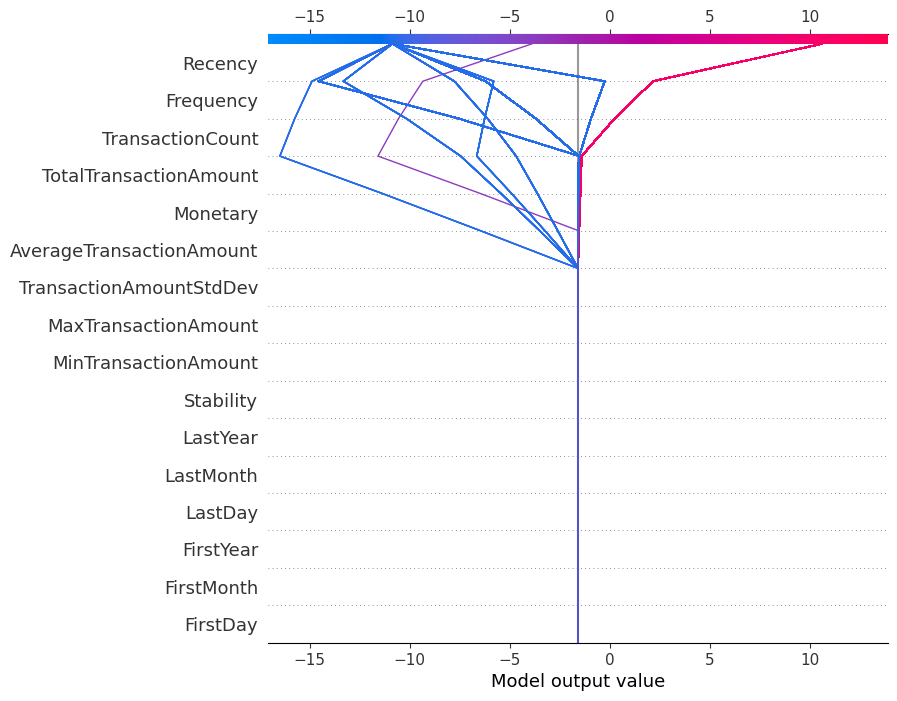

In [37]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)